# Stroke Risk Prediction-Modeling

In our previous steps, we successfully cleaned up and explored our dataset, gaining valuable insights and ensuring data quality. Now, we will move on to the crucial phase of preprocessing our data. This stage involves preparing the data for modeling by transforming it into a format that machine learning algorithms can effectively utilize.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.utils import resample

In [20]:
#load cleaned data set from EDA
df = pd.read_csv('cleaned_dataset.csv')

In [21]:
#Preview data
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,formerly smoked,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,never smoked,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,formerly smoked,0


To prepare our data for modeling, we must first transform it to ensure accurate execution of our models. One important step is removing the 'id' column, as it doesn't hold any meaningful information and could potentially interfere with the analysis.

In [22]:
#Drop 'id' column
df = df.drop(columns=['id'])

print(df.head())

   gender   age  hypertension  heart_disease ever_married     work_type  \
0    Male   3.0             0              0           No      children   
1    Male  58.0             1              0          Yes       Private   
2  Female   8.0             0              0           No       Private   
3  Female  70.0             0              0          Yes       Private   
4    Male  14.0             0              0           No  Never_worked   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Rural              95.12  18.0  formerly smoked       0  
1          Urban              87.96  39.2     never smoked       0  
2          Urban             110.89  17.6     never smoked       0  
3          Rural              69.04  35.9  formerly smoked       0  
4          Rural             161.28  19.1  formerly smoked       0  


## Feature Importance

In this section, we aim to identify the most significant features influencing stroke prediction in our dataset. While we have body biometrics like BMI and glucose levels, we will also investigate other factors such as work type and marital status to see if they play a crucial role in predicting strokes.

<Axes: >

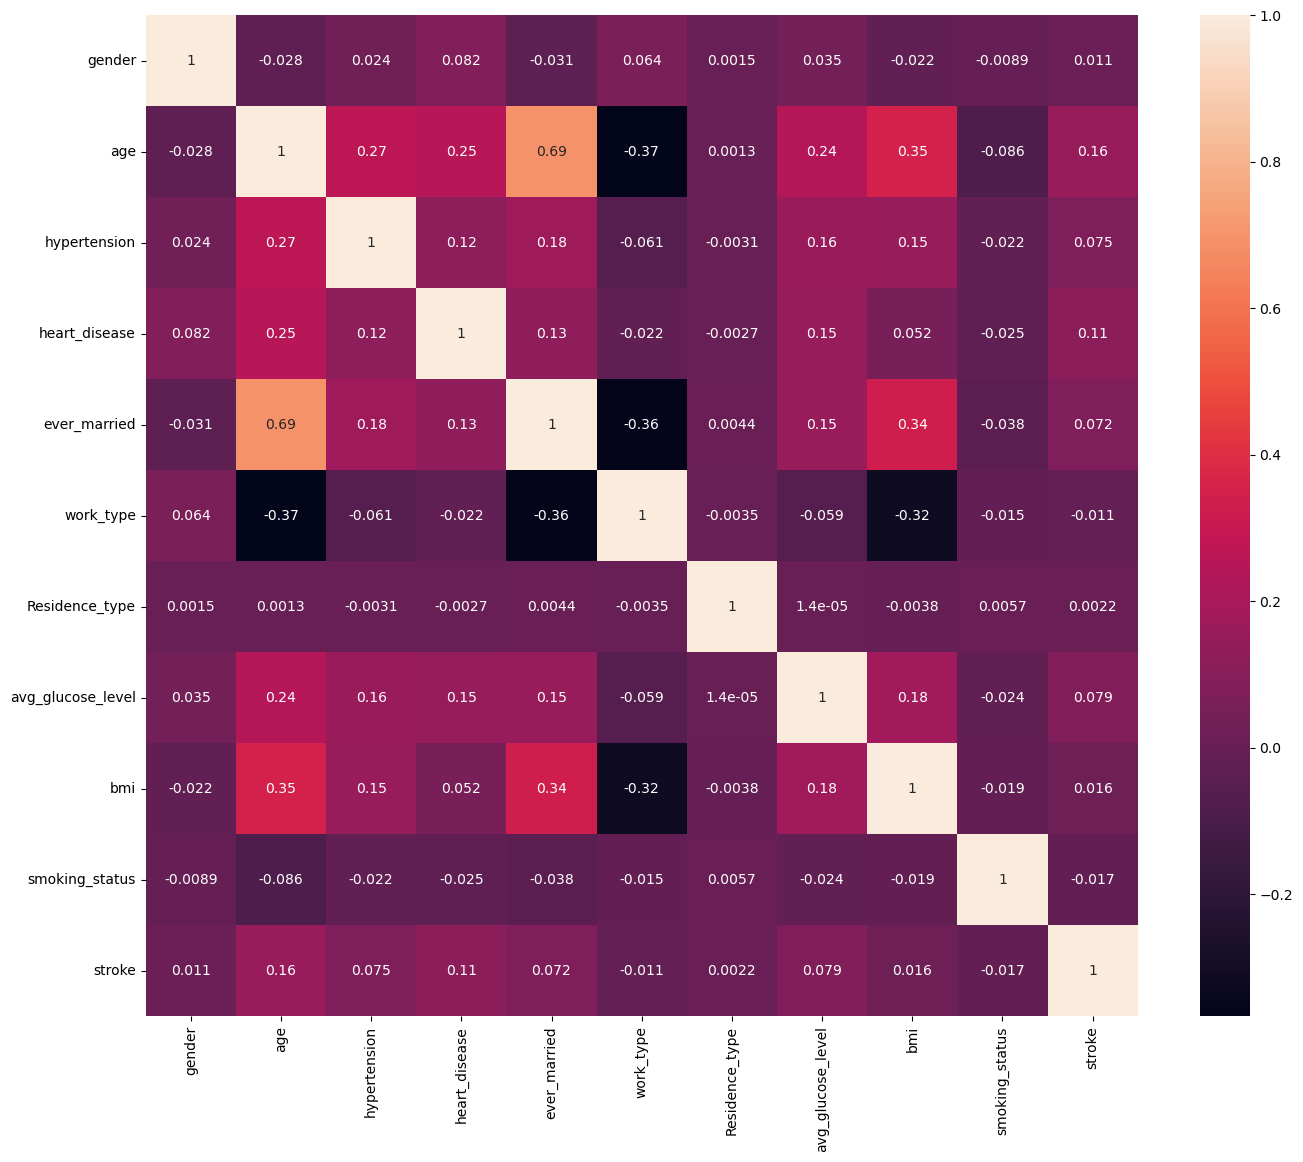

In [23]:
corr_data =df.copy()
encoder  =LabelEncoder()
for col in corr_data.select_dtypes(include="object").columns:
    corr_data[col] =encoder.fit_transform(corr_data[col])
    
plt.figure(figsize=(16,13))
sns.heatmap(data=corr_data.corr(),annot=True)


In our analysis of stroke prediction, we found that age, BMI, marital status, and average glucose levels are significant factors. It is expected that BMI, age, and glucose levels correlate with stroke risk, given that higher BMI and glucose levels are known risk factors, and older individuals are generally at higher risk for strokes. Interestingly, marital status also emerged as a notable factor. This may reflect that older individuals, who are at higher risk for strokes, are more likely to have been married at some point, rather than indicating a direct relationship between marital status and stroke risk. This insight underscores the importance of considering demographic variables alongside biometric data in predictive modeling.

### Transforming Data

In this phase, we focus on transforming our raw dataset into a format optimized for machine learning models. This includes handling categorical variables through encoding techniques, scaling numerical features to a uniform range, and splitting the data into training and testing sets for model evaluation. 

In [24]:
#Split data into positive stoke and negative
had_stroke = df[df["stroke"]==1]
no_stroke = df[df["stroke"]==0]

#resample data 
resampled_had_stroke = resample(had_stroke,replace=True , n_samples=no_stroke.shape[0] , random_state=123 )
resampled_data = pd.concat([no_stroke,resampled_had_stroke])

In [25]:
#Preview
print(resampled_data.head())

   gender   age  hypertension  heart_disease ever_married     work_type  \
0    Male   3.0             0              0           No      children   
1    Male  58.0             1              0          Yes       Private   
2  Female   8.0             0              0           No       Private   
3  Female  70.0             0              0          Yes       Private   
4    Male  14.0             0              0           No  Never_worked   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Rural              95.12  18.0  formerly smoked       0  
1          Urban              87.96  39.2     never smoked       0  
2          Urban             110.89  17.6     never smoked       0  
3          Rural              69.04  35.9  formerly smoked       0  
4          Rural             161.28  19.1  formerly smoked       0  


Here, we are addressing the class imbalance in our stroke dataset by performing a resampling technique. First, we split the data into two subsets: one containing individuals who have had a stroke (had_stroke) and another with those who have not (no_stroke). Given that the number of stroke cases is likely much smaller than the non-stroke cases, we use resampling to balance the classes. Specifically, we resample the had_stroke subset with replacement to create a new dataset (resampled_had_stroke) that has the same number of samples as the no_stroke subset. Finally, we concatenate the no_stroke subset with the resampled_had_stroke subset to form a balanced dataset (resampled_data). This balanced dataset will help improve the performance and fairness of our predictive model by ensuring that the model does not become biased towards the majority class.

In [26]:
#Make dummy variables for categorical columns
cols = ['gender','hypertension','heart_disease', 'ever_married', 'work_type', 'Residence_type','smoking_status']
dummy = pd.get_dummies(resampled_data[cols],dtype=int)
updated_df = pd.concat([resampled_data,dummy],axis=1).drop(columns=cols)

In this step, we are converting categorical variables into dummy variables to prepare the data for modeling. We first identify the columns with categorical data and create binary (dummy) variables for each category. This transformation is necessary because most machine learning algorithms require numerical input, and dummy variables allow us to include categorical data in our models effectively.

In [27]:
encoder = LabelEncoder()
updated_df["age"] = encoder.fit_transform(updated_df["age"])

We are using LabelEncoder to transform the age column from categorical to numeric values. This encoding assigns a unique integer to each distinct age, allowing the machine learning algorithm to process the age data effectively. This step is crucial as it ensures that the age data is in a suitable format for modeling.

In [28]:
# Select columns to scale
cols_to_scale = ['age', 'avg_glucose_level', 'bmi']

# Create a new DataFrame for scaled data
scaled_data = updated_df.copy()

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform selected columns
scaled_data[cols_to_scale] = scaler.fit_transform(scaled_data[cols_to_scale])

# Display preview of scaled data
scaled_data

,age,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.233010,0.169964,0.090286,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,0
1,0.766990,0.139631,0.332571,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0
2,0.281553,0.236772,0.085714,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0
3,0.883495,0.059479,0.294857,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0
4,0.339806,0.450244,0.102857,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5412,0.922330,0.184495,0.177143,1,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0
23936,0.864078,0.518068,0.228571,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0
3712,0.854369,0.029401,0.173714,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1
6701,0.864078,0.114806,0.194286,1,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0


We are scaling the numerical data (age, avg_glucose_level, and bmi) using the MinMaxScaler. This transformation adjusts the values to a range between 0 and 1, ensuring that all features are on a similar scale. Scaling numerical features helps improve the performance and stability of machine learning models. Finally, we preview the transformed data to verify the changes.

In [29]:
#Create X and y variables 
X = updated_df.drop(columns="stroke")
y = updated_df["stroke"]

#Splilt into Training and Testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=7,shuffle=True)

Now we need to define our X and y variables, where y is our target variable (stroke) and X are our features. After that, we split our data into two parts: 80% for training the model and 20% for testing how well it works.

In [30]:
#View shape of transformed data
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((68187, 18), (17047, 18), (68187,), (17047,))

We can check the shape of our X_train, X_test, y_train, and y_test to ensure that our data has been correctly split into training and testing sets. Here we can see our shapes align as expected and we can proceed to the modeling stage of our data analysis. 

## Modeling

In this section, we explore building predictive models for stroke prediction using various machine learning techniques. Specifically, we will explore Decision Tree, Random Forest, and K-Nearest Neighbors (KNN). Each model offers unique advantages in capturing complex relationships within our data to predict the likelihood of strokes accurately.

We will implement models using Grid Search and cross-validation techniques to optimize performance systematically. This approach allows us to find the best combination of hyperparameters, enhancing model accuracy and robustness.

Through this exploration, we aim to identify the most effective model for our dataset, providing insights into factors contributing to stroke prediction and demonstrating the practical application of machine learning in healthcare analytics.

In [31]:
from io import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.tree import export_graphviz, plot_tree, DecisionTreeClassifier
from sklearn import tree, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, balanced_accuracy_score, precision_score, recall_score, roc_auc_score, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

### Decision Tree

Decision Tree models are a straightforward way to predict strokes based on patient data. They work by splitting the data into groups based on the most important features, making the decision process easy to follow and visualize. This clarity helps healthcare professionals understand and trust the results, which is crucial in stroke risk assessment.

However, Decision Trees can sometimes overfit the data, especially if they become too complex. They can also be a bit unstable, as small changes in the data can lead to different outcomes. In our use of Decision Trees for stroke prediction, we'll focus on their clear benefits while managing these challenges. By fine-tuning the model and checking its performance carefully, we aim to improve stroke risk assessment and offer useful insights for healthcare.

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Best parameters found:  {'class_weight': None, 'criterion': 'gini', 'max_depth': 40, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5}
Best cross-validation score:  0.9909073595943594


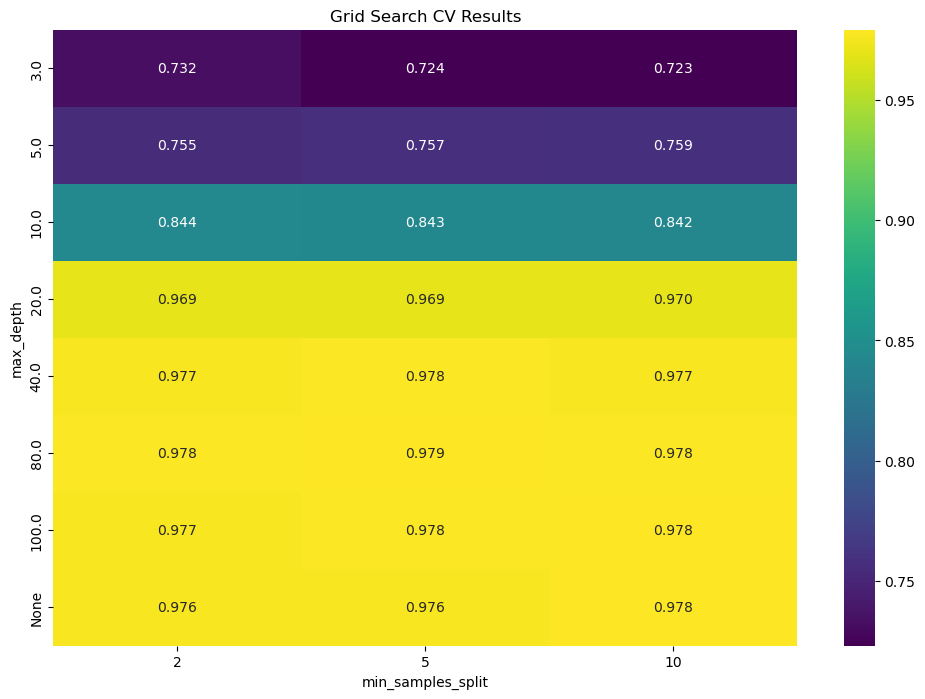

In [27]:
# Define parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 10, 20, 40, 80, 100],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': [None, 'sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}

# Initialize model
dt = DecisionTreeClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X, y)

# Best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# Results DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Extracting mean test scores and parameters
mean_test_scores = results_df['mean_test_score']
params = results_df['params']

# Convert params to DataFrame for easier plotting
params_df = pd.DataFrame(params.tolist())

# Merge params and scores into a single DataFrame
plot_df = pd.concat([params_df, mean_test_scores], axis=1)

# Ensure that the columns max_depth and min_samples_split are properly handled if they contain None
plot_df['max_depth'].fillna('None', inplace=True)
plot_df['min_samples_split'].fillna('None', inplace=True)

# Plotting results for max_depth and min_samples_split
plot_pivot = plot_df.pivot_table(index='max_depth', columns='min_samples_split', values='mean_test_score')

plt.figure(figsize=(12, 8))
sns.heatmap(plot_pivot, annot=True, fmt=".3f", cmap='viridis')
plt.title('Grid Search CV Results')
plt.xlabel('min_samples_split')
plt.ylabel('max_depth')
plt.show()

This heatmap highlights the impact of varying min_samples_split and max_depth on model performance. The best parameters identified through GridSearchCV include a max_depth of 40 and min_samples_split of 5, achieving a peak cross-validation score of 99.09%. The 'log2' setting for max_features and a min_samples_leaf of 1 further optimize our model, allowing us to efficiently capture the most predictive features without overfitting, as demonstrated in this visualization.

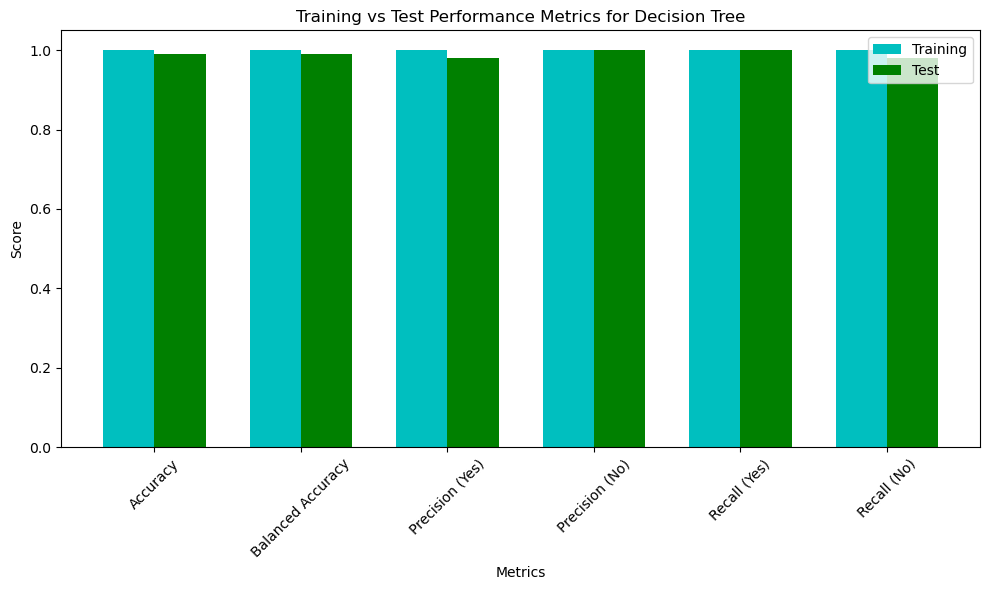

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      8498
           1       0.98      1.00      0.99      8549

    accuracy                           0.99     17047
   macro avg       0.99      0.99      0.99     17047
weighted avg       0.99      0.99      0.99     17047


Confusion Matrix:
[[8333  165]
 [   0 8549]]
Balanced accuracy: 0.9902918333725583
Precision score for "Yes": 0.981064952949277
Precision score for "No": 1.0
Recall score for "Yes": 1.0
Recall score for "No": 0.9805836667451165


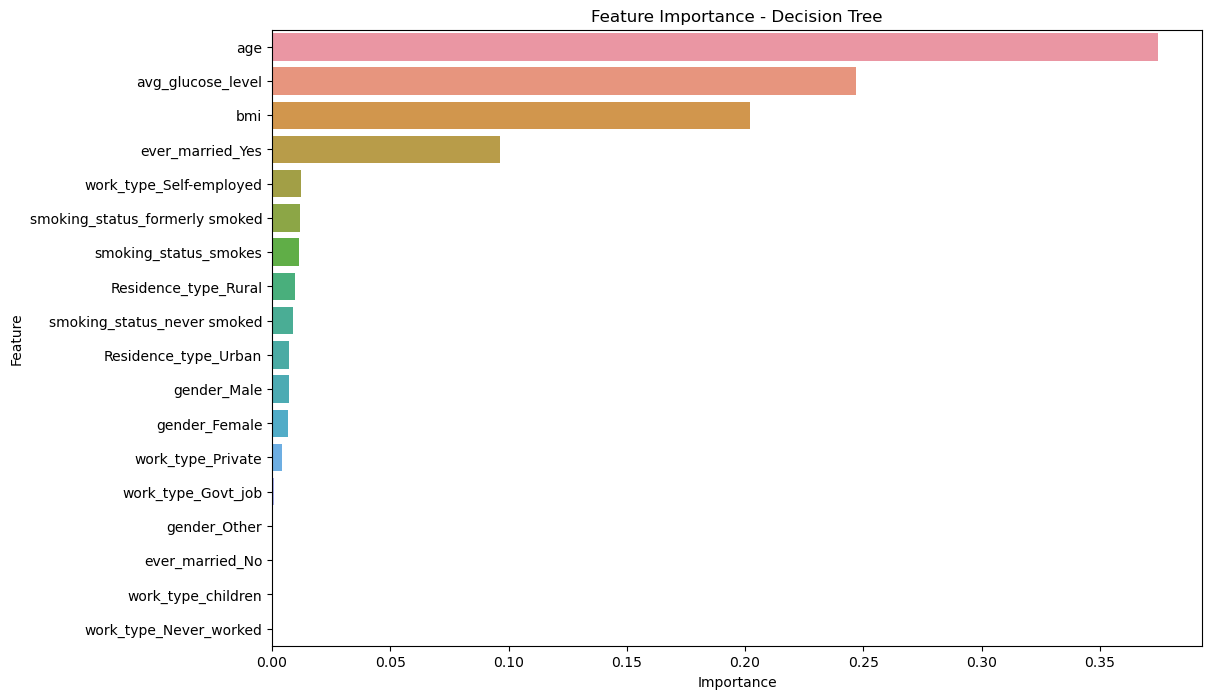

In [38]:
# Initialize the classifier with the best parameters
best_clf = DecisionTreeClassifier(
    class_weight=None,
    criterion='gini',
    max_depth=40,
    max_features='log2',
    min_samples_leaf=1,
    min_samples_split=5,
    random_state=42
)

# Train the classifier on the training data
best_clf.fit(X_train, y_train)

# Predict on the training data
y_pred_train_dt = best_clf.predict(X_train)

# Predict on the test data
y_pred_test_dt = best_clf.predict(X_test)

# Calculate metrics for the training set
train_accuracy_dt = metrics.accuracy_score(y_train, y_pred_train_dt)
train_balanced_accuracy_dt = metrics.balanced_accuracy_score(y_train, y_pred_train_dt)
train_precision_yes_dt = metrics.precision_score(y_train, y_pred_train_dt, pos_label=1)
train_precision_no_dt = metrics.precision_score(y_train, y_pred_train_dt, pos_label=0)
train_recall_yes_dt = metrics.recall_score(y_train, y_pred_train_dt, pos_label=1)
train_recall_no_dt = metrics.recall_score(y_train, y_pred_train_dt, pos_label=0)

# Calculate metrics for the test set
test_accuracy_dt = metrics.accuracy_score(y_test, y_pred_test_dt)
test_balanced_accuracy_dt = metrics.balanced_accuracy_score(y_test, y_pred_test_dt)
test_precision_yes_dt = metrics.precision_score(y_test, y_pred_test_dt, pos_label=1)
test_precision_no_dt = metrics.precision_score(y_test, y_pred_test_dt, pos_label=0)
test_recall_yes_dt = metrics.recall_score(y_test, y_pred_test_dt, pos_label=1)
test_recall_no_dt = metrics.recall_score(y_test, y_pred_test_dt, pos_label=0)

# Define metrics and labels
metrics_names_dt = ['Accuracy', 'Balanced Accuracy', 'Precision (Yes)', 'Precision (No)', 'Recall (Yes)', 'Recall (No)']
training_metrics_dt = [train_accuracy_dt, train_balanced_accuracy_dt, train_precision_yes_dt, train_precision_no_dt, train_recall_yes_dt, train_recall_no_dt]
test_metrics_dt = [test_accuracy_dt, test_balanced_accuracy_dt, test_precision_yes_dt, test_precision_no_dt, test_recall_yes_dt, test_recall_no_dt]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = range(len(metrics_names_dt))

bar1 = ax.bar(index, training_metrics_dt, bar_width, label='Training', color='c')
bar2 = ax.bar([i + bar_width for i in index], test_metrics_dt, bar_width, label='Test', color='g')

ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Training vs Test Performance Metrics for Decision Tree')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(metrics_names_dt, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

# Print classification report and confusion matrix for the test data
print("Classification Report:")
print(metrics.classification_report(y_test, y_pred_test_dt))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_test_dt))

# Print additional metrics
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test, y_pred_test_dt))
print('Precision score for "Yes":', metrics.precision_score(y_test, y_pred_test_dt, pos_label=1))
print('Precision score for "No":', metrics.precision_score(y_test, y_pred_test_dt, pos_label=0))
print('Recall score for "Yes":', metrics.recall_score(y_test, y_pred_test_dt, pos_label=1))
print('Recall score for "No":', metrics.recall_score(y_test, y_pred_test_dt, pos_label=0))

# Feature Importance for Decision Tree
importances_dt = best_clf.feature_importances_
feature_names_dt = X.columns  # Assuming X contains the original feature names
feature_importance_df_dt = pd.DataFrame({'Feature': feature_names_dt, 'Importance': importances_dt})
feature_importance_df_dt = feature_importance_df_dt.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_dt)
plt.title('Feature Importance - Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

The Decision Tree model for stroke prediction, after hyperparameter tuning, demonstrates high performance with an overall accuracy of 99% on both training and test sets. Precision and recall scores for predicting strokes reached 0.98 and 1.00, respectively, indicating excellent identification of stroke cases with minimal false positives.

Feature importance analysis reveals that age, average glucose level, and BMI are the most influential factors, followed by marital status. This underscores the significance of both biometric and demographic variables in stroke prediction.

Overall, the tuned model offers robust predictions, making it a valuable tool for identifying individuals at risk of stroke, enabling timely interventions and better health outcomes.

### Random Forest

Random Forest models provide a robust approach to predicting strokes by combining multiple decision trees. This ensemble method enhances accuracy by averaging the results of various trees, reducing the risk of overfitting and improving stability. In stroke prediction, Random Forests are valuable for handling complex datasets with numerous interacting risk factors, such as age, BMI, and glucose levels.

While individual decision trees can be sensitive to data changes, Random Forests mitigate this by using a collection of trees, ensuring more reliable predictions. By optimizing parameters and carefully evaluating performance, we leverage the strengths of Random Forests to enhance stroke risk assessment, providing clear insights that support healthcare decision-making.

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      8498
           1       0.99      1.00      1.00      8549

    accuracy                           1.00     17047
   macro avg       1.00      1.00      1.00     17047
weighted avg       1.00      1.00      1.00     17047


Confusion Matrix:
[[8438   60]
 [   0 8549]]
Balanced accuracy: 0.9964697575900212
Precision score for "Yes": 0.9930305494250203
Precision score for "No": 1.0
Recall score for "Yes": 1.0
Recall score for "No": 0.9929395151800423


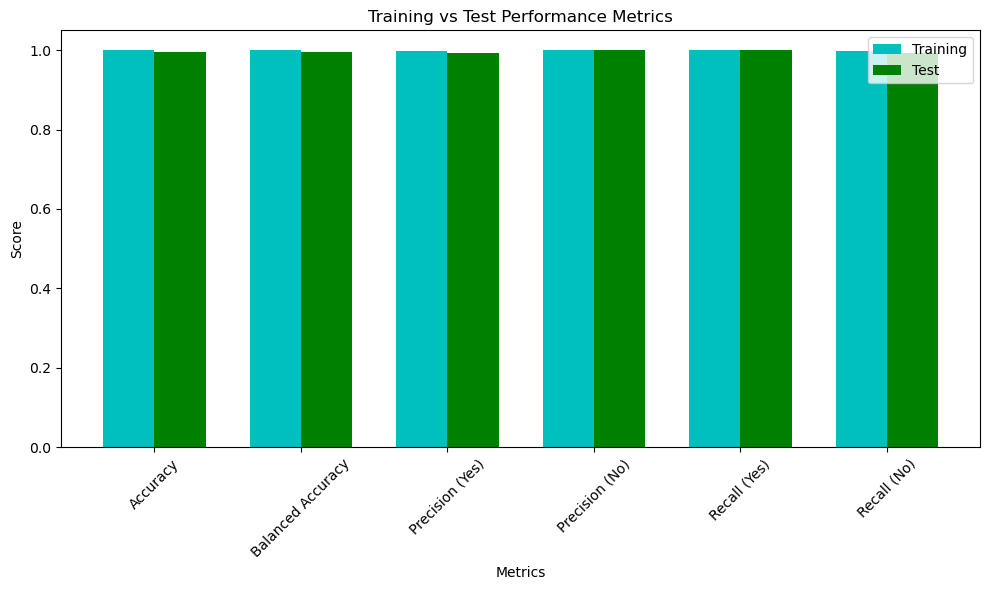

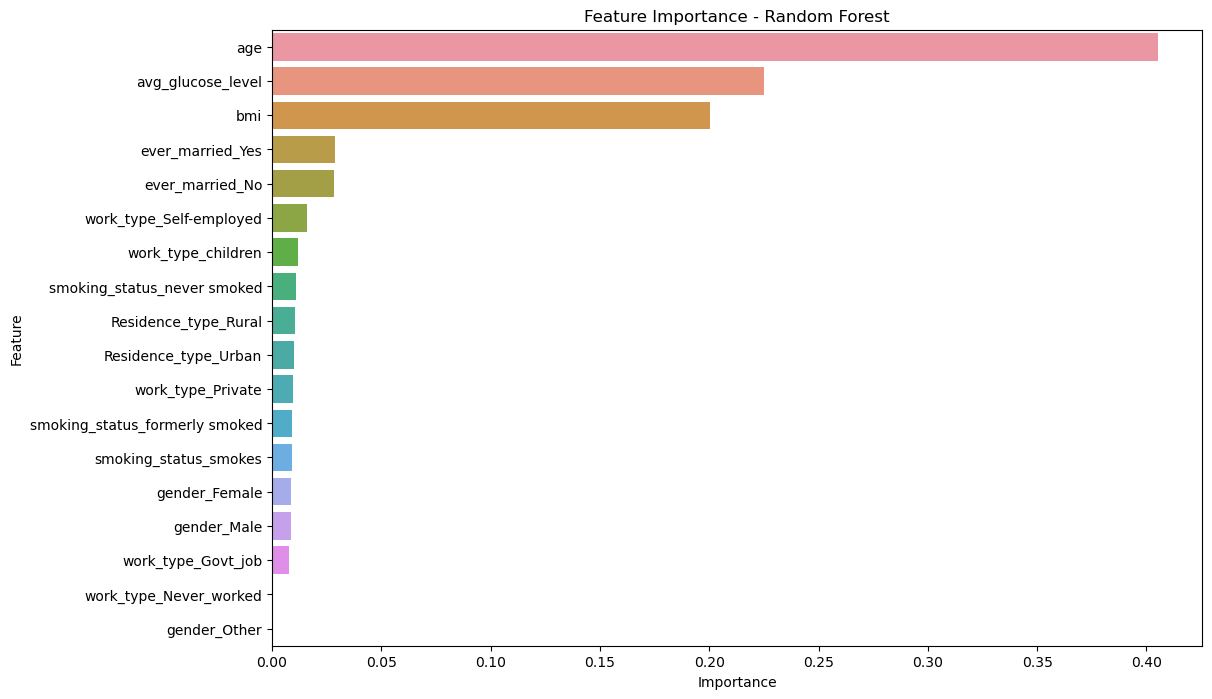

In [39]:
# Define the Random Forest classifier
rf = RandomForestClassifier(max_samples=0.01, random_state=42)

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize Grid Search Cross Validation
grid_search = GridSearchCV(
    estimator=rf, param_grid=param_grid, cv=5,
    scoring='balanced_accuracy', verbose=2, n_jobs=-1
)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

# Initialize the classifier with the best parameters
best_rf_clf = RandomForestClassifier(**grid_search.best_params_, random_state=42)
best_rf_clf.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = best_rf_clf.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Print additional metrics
print("Balanced accuracy:", balanced_accuracy_score(y_test, y_pred_rf))
print('Precision score for "Yes":', precision_score(y_test, y_pred_rf, pos_label=1))
print('Precision score for "No":', precision_score(y_test, y_pred_rf, pos_label=0))
print('Recall score for "Yes":', recall_score(y_test, y_pred_rf, pos_label=1))
print('Recall score for "No":', recall_score(y_test, y_pred_rf, pos_label=0))

# Metrics on training and test sets
y_pred_train = best_rf_clf.predict(X_train)
train_metrics = [
    accuracy_score(y_train, y_pred_train),
    balanced_accuracy_score(y_train, y_pred_train),
    precision_score(y_train, y_pred_train, pos_label=1),
    precision_score(y_train, y_pred_train, pos_label=0),
    recall_score(y_train, y_pred_train, pos_label=1),
    recall_score(y_train, y_pred_train, pos_label=0)
]
test_metrics = [
    accuracy_score(y_test, y_pred_rf),
    balanced_accuracy_score(y_test, y_pred_rf),
    precision_score(y_test, y_pred_rf, pos_label=1),
    precision_score(y_test, y_pred_rf, pos_label=0),
    recall_score(y_test, y_pred_rf, pos_label=1),
    recall_score(y_test, y_pred_rf, pos_label=0)
]
metrics_names = ['Accuracy', 'Balanced Accuracy', 'Precision (Yes)', 'Precision (No)', 'Recall (Yes)', 'Recall (No)']

# Plotting training vs test performance metrics
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = range(len(metrics_names))

ax.bar(index, train_metrics, bar_width, label='Training', color='c')
ax.bar([i + bar_width for i in index], test_metrics, bar_width, label='Test', color='g')
ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Training vs Test Performance Metrics')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(metrics_names, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

# Feature Importance
importances = best_rf_clf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

The Random Forest model shows impressive performance with an overall accuracy of 100%, demonstrating high precision and recall for both stroke and non-stroke predictions. Specifically, the model achieved a precision score of 0.99 for stroke cases and 1.00 for non-stroke cases, indicating that false positives are minimal. The balanced accuracy of 99.65% underscores the model's effectiveness in distinguishing between classes.

Compared to a Decision Tree model, the Random Forest generally offers enhanced stability and reduced overfitting due to its ensemble approach, making it more reliable in real-world applications. In stroke prediction, this reliability is crucial for accurately identifying high-risk individuals, thereby enabling timely interventions and improving patient outcomes. The higher precision and recall in the Random Forest model suggest it is more suitable for deployment in clinical settings where the cost of false positives or negatives is significant.

The feature importance figure highlights that age, average glucose level, and BMI are significant predictors in the Random Forest model for stroke risk. These factors play crucial roles in determining an individual's likelihood of stroke. High values in these features should prompt healthcare providers to consider more intensive monitoring and preventive measures for patients deemed high risk.

## K-Nearest Neighbor

The K-Nearest Neighbors (KNN) algorithm is a versatile machine learning method used for classification tasks, including stroke prediction. KNN is particularly effective due to its simplicity and intuitive approach, relying on the proximity of data points to make predictions. This model works well in scenarios where relationships between variables are complex and non-linear, which is often the case in medical data.

By examining the similarities between patients based on features like age, BMI, and glucose levels, KNN can effectively identify patterns associated with stroke risk. Its ability to handle varying distributions of data makes it a suitable choice for predicting stroke likelihood, where accurate classification can lead to timely interventions and better patient outcomes.

In [37]:
# Initialize lists to store results
n_neighbors_values = [1, 3, 5, 7, 9, 15]
scores = []

for n in n_neighbors_values:
    # Initialize the KNN classifier with the current n_neighbors
    knn_clf = KNeighborsClassifier(n_neighbors=n)
    
    # Fit the classifier to the training data
    knn_clf.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = knn_clf.predict(X_test)
    
    # Evaluate the model
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    scores.append(balanced_accuracy)

    print(f"\nResults for n_neighbors = {n}:")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Balanced Accuracy:", balanced_accuracy)
    print("Precision (Minority Class):", precision_score(y_test, y_pred, pos_label=1))
    print("Recall (Minority Class):", recall_score(y_test, y_pred, pos_label=1))
    print("ROC AUC Score:", roc_auc_score(y_test, y_pred))


Results for n_neighbors = 1:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      8498
           1       0.98      1.00      0.99      8549

    accuracy                           0.99     17047
   macro avg       0.99      0.99      0.99     17047
weighted avg       0.99      0.99      0.99     17047

Balanced Accuracy: 0.9898799717580606
Precision (Minority Class): 0.9802774911134045
Recall (Minority Class): 1.0
ROC AUC Score: 0.9898799717580606

Results for n_neighbors = 3:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      8498
           1       0.96      1.00      0.98      8549

    accuracy                           0.98     17047
   macro avg       0.98      0.98      0.98     17047
weighted avg       0.98      0.98      0.98     17047

Balanced Accuracy: 0.9798776182631208
Precision (Minority Class): 0.9615341356427849
Recall 

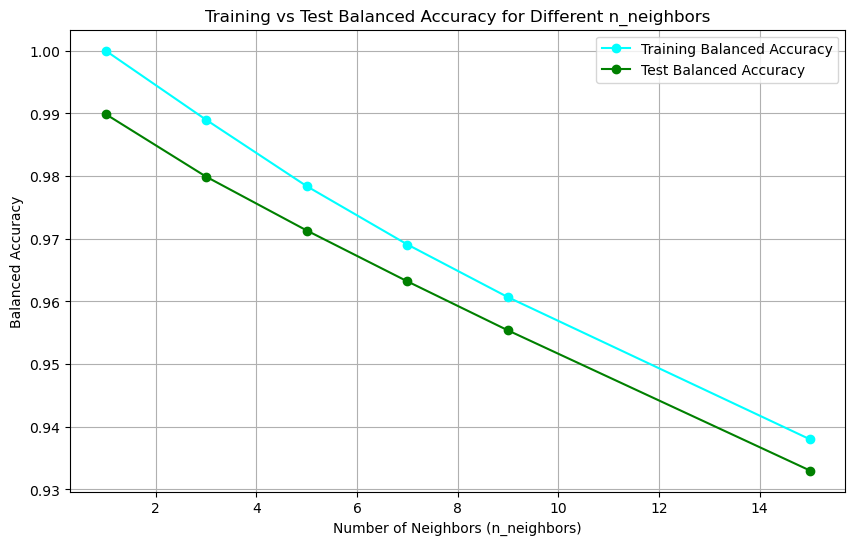

In [40]:
# Initialize lists to store results
n_neighbors_values = [1, 3, 5, 7, 9, 15]
train_scores = []
test_scores = []

for n in n_neighbors_values:
    # Initialize the KNN classifier with the current n_neighbors
    knn_clf = KNeighborsClassifier(n_neighbors=n)
    
    # Fit the classifier to the training data
    knn_clf.fit(X_train, y_train)
    
    # Predict on the training and test data
    y_train_pred = knn_clf.predict(X_train)
    y_test_pred = knn_clf.predict(X_test)
    
    # Calculate balanced accuracy for both training and test data
    train_balanced_accuracy = balanced_accuracy_score(y_train, y_train_pred)
    test_balanced_accuracy = balanced_accuracy_score(y_test, y_test_pred)
    
    train_scores.append(train_balanced_accuracy)
    test_scores.append(test_balanced_accuracy)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_values, train_scores, marker='o', color='cyan', label='Training Balanced Accuracy')
plt.plot(n_neighbors_values, test_scores, marker='o', color='green', label='Test Balanced Accuracy')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Balanced Accuracy')
plt.title('Training vs Test Balanced Accuracy for Different n_neighbors')
plt.legend()
plt.grid(True)
plt.show()

The K-Nearest Neighbors (KNN) model demonstrated varying performance across different values of n_neighbors. At n_neighbors = 1, the model achieved high accuracy (99%) and balanced accuracy (98.99%), indicating strong precision and recall for both classes. However, as the number of neighbors increased, there was a noticeable decline in performance.

For instance, at n_neighbors = 3, the balanced accuracy decreased to 97.99%, and at n_neighbors = 15, it further dropped to 93.30%. This trend suggests that while KNN performs well with a smaller number of neighbors, it becomes less effective as the complexity increases. Despite these variations, the recall for the minority class remained consistently high at 100% across all neighbor settings, highlighting the model's ability to identify stroke cases accurately.

Overall, while KNN can be useful in certain scenarios, especially with a small n_neighbors, its performance declines with larger values, making it less reliable compared to other models in complex datasets for stroke prediction.

## Conclusion

In this analysis, we evaluated three machine learning models for stroke prediction: Random Forest, Decision Tree, and K-Nearest Neighbors (KNN).

Random Forest emerged as the most effective model, achieving the highest accuracy and balanced accuracy (100% and 99.65%, respectively). Its robustness and precision make it ideal for minimizing false negatives and false positives, which is crucial in clinical settings.

Decision Tree showed strong performance with an accuracy of 99% and balanced accuracy of 98.96%. While slightly less effective than Random Forest, it offers valuable interpretability, aiding in understanding decision paths.

K-Nearest Neighbors (KNN) displayed variable performance, with accuracy declining as the number of neighbors increased. It achieved its best results with 99% accuracy at n_neighbors = 1, but its stability decreases with higher values, making it less suitable for complex datasets.

In conclusion, the Random Forest model is recommended for stroke prediction due to its superior accuracy and reliability, providing an excellent tool for healthcare professionals or others to assess patient risk accurately and implement timely interventions.

## Implementation

The application of stroke prediction models can significantly impact various sectors:

Clinical/Hospitals:
Integrating predictive models into electronic health records (EHR) can help clinicians identify high-risk patients early, allowing for targeted interventions and personalized care plans, ultimately improving patient outcomes.

Insurance Companies:
Utilizing these models for risk assessment can enable more accurate premium pricing and the development of preventative health programs. This approach helps in mitigating costs associated with stroke-related claims and promotes healthier lifestyles among policyholders.

Biotech Companies:
By incorporating stroke prediction models into health monitoring devices, biotech firms can provide users with real-time risk assessments, facilitating timely lifestyle adjustments and medical consultations. This integration supports preventive healthcare and enhances user engagement.

These implementations demonstrate the broad applicability of stroke prediction models, highlighting their potential to improve healthcare delivery, reduce costs, and foster innovation across various industries.

## Future Work

In the ongoing pursuit of enhancing stroke prediction, several avenues for future research and development are proposed. First, incorporating larger and more diverse datasets could improve model generalizability and accuracy across different populations. Additionally, exploring advanced modeling techniques such as ensemble learning and neural networks may further refine predictive capabilities.

Another promising area is integrating real-time data from wearable health devices, which could enable continuous monitoring and early intervention for at-risk individuals. Finally, collaboration with healthcare professionals to validate and fine-tune these models in clinical settings will be crucial for practical implementation, ensuring that predictive tools are both accurate and actionable in real-world applications.